<a href="https://colab.research.google.com/github/RM-RAMASAMY/Clustering-Algorithms/blob/main/DBscan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [23]:
%matplotlib inline
import seaborn as sns  # Import Seaborn
# Use the 'seaborn-v0_8-whitegrid' style with sns.set_theme()
# Seaborn v0.12.0 onwards uses this command to change plot styles instead of the previous plt.style.use()
sns.set_theme(style="whitegrid")

In [29]:
# Generate some data
X, y_true = make_blobs(n_samples=700, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

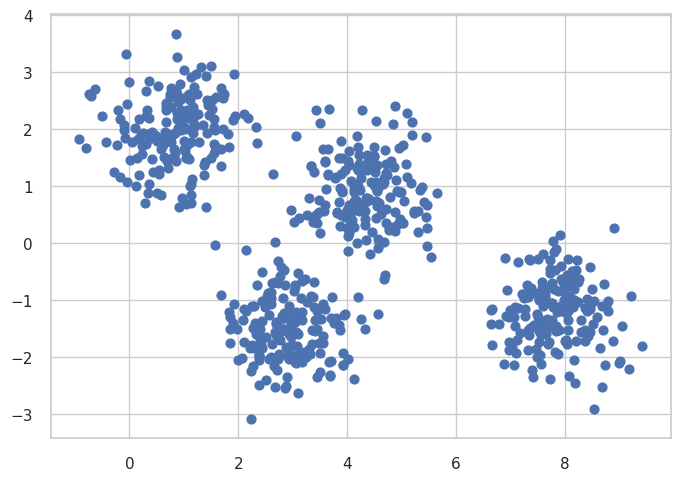

In [30]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

In [ ]:
def plot_scatter(data, title, subplot, color_map='viridis'):
    """
    Create scatter plot of data

    Parameters:
    - data: Data to plot
    - title: Plot title
    - subplot: Subplot position
    - color_map: Matplotlib colormap
    """
    plt.subplot(subplot)
    plt.scatter(data[:, 0], data[:, 1],
                c=data[:, 0],
                cmap=color_map,
                alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

In [ ]:
def visualize_preprocessing(X, X_scaled):
    """
    Visualize data before and after preprocessing
    """
    # Original data
    plot_scatter(X,
                 'Original Data',
                 221)

    # Scaled data
    plot_scatter(X_scaled,
                 'Standardized Data',
                 222)

In [72]:
def perform_dbscan(X_scaled, eps=0.5, min_samples=10):
    """
    Perform DBSCAN clustering

    Parameters:
    - X_scaled: Standardized feature matrix
    - eps: Maximum distance between two samples to be considered in the same neighborhood
    - min_samples: Minimum number of samples in a neighborhood for a point to be considered a core point
    """
    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)
    # Set figure size
    plt.figure(figsize=(20, 15))  # Adjust width and height as needed
    # Visualize clustering process
    plt.subplot(223)
    # Add circles for a few representative points
    for i in range(len(X_scaled)):
        circle = plt.Circle((X_scaled[i, 0], X_scaled[i, 1]), eps,
                           color='black', fill=False, alpha=0.3)  # Adjust alpha for visibility
        plt.gca().add_artist(circle)

    scatter = plt.scatter(X_scaled[:, 0],
                         X_scaled[:, 1],
                         c=clusters,
                         cmap='Set1',
                         alpha=0.7)
    plt.title(f'DBSCAN Clustering\n(eps={eps}, min_samples={min_samples})')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.colorbar(scatter, label='Cluster Labels')


    return clusters


In [ ]:
def analyze_clusters(X, clusters):
    """
    Analyze and report clustering results
    """
    unique_clusters = np.unique(clusters)

    print("\n--- DBSCAN Clustering Results ---")
    print(f"Total Data Points: {len(clusters)}")
    print(f"Number of Clusters: {len(unique_clusters[unique_clusters != -1])}")
    print(f"Number of Noise Points: {np.sum(clusters == -1)}")

    # Detailed cluster breakdown
    plt.subplot(224)
    cluster_sizes = [np.sum(clusters == cluster)
                     for cluster in unique_clusters if cluster != -1]
    plt.bar(range(len(cluster_sizes)), cluster_sizes)
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Index')
    plt.ylabel('Number of Points')



--- DBSCAN Clustering Results ---
Total Data Points: 700
Number of Clusters: 4
Number of Noise Points: 10


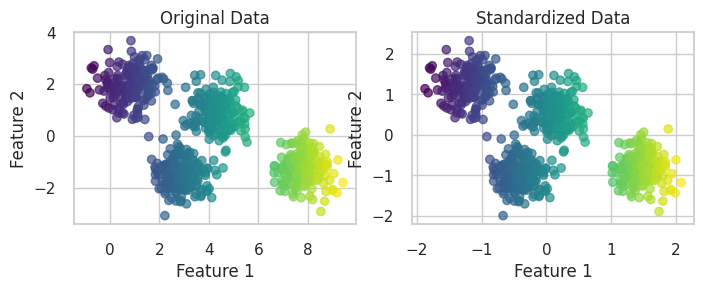

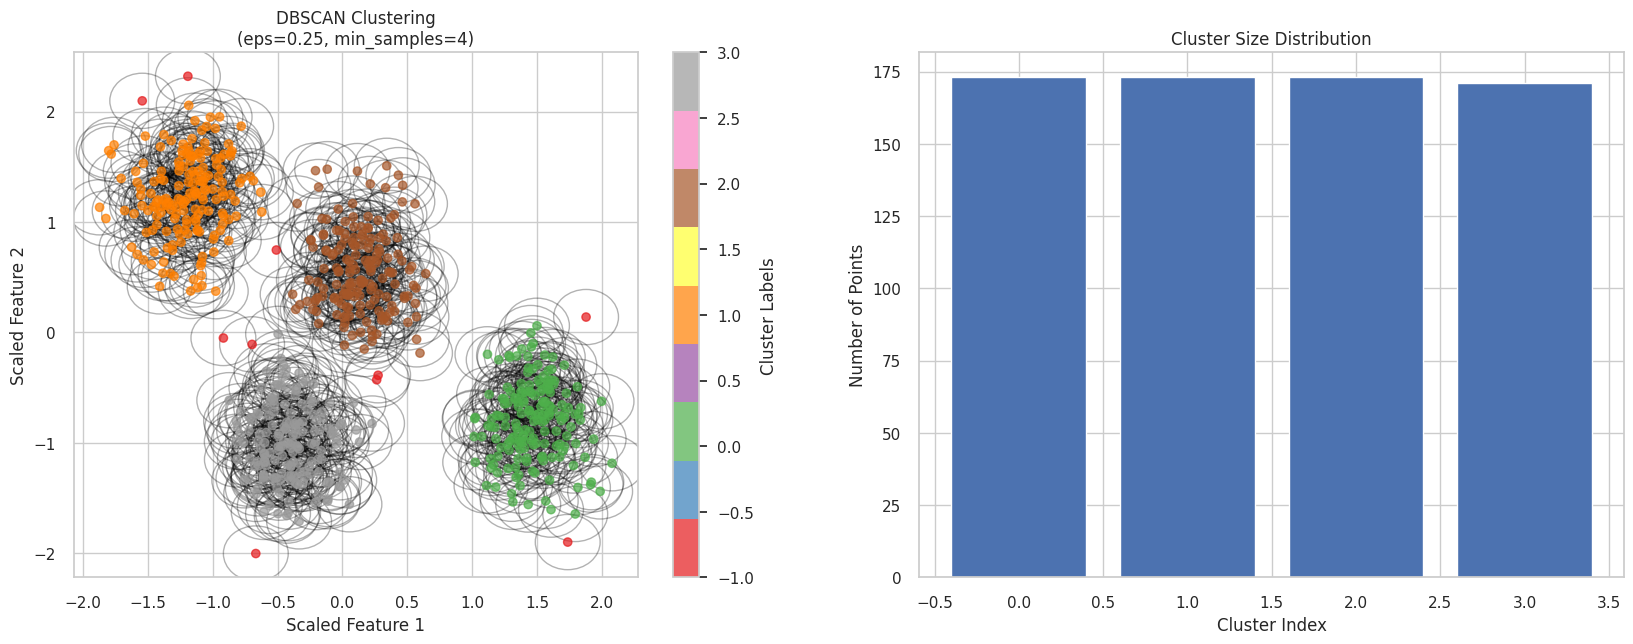

<Figure size 2000x1500 with 0 Axes>

In [74]:
# Select two features for 2D visualization
features = [0, 1]  # Sepal Length and Sepal Width
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step-by-step visualization
visualize_preprocessing(X, X_scaled)
clusters = perform_dbscan(X_scaled, eps=0.25, min_samples=4)
analyze_clusters(X, clusters)
plt.tight_layout()
plt.show()